
# End‑to‑End Data Analysis
  
It covers:
- Robust data loading (CSV/Excel) and quick **data understanding**
- **Pandas** essentials and advanced patterns (groupby, pivot_table, merge, string/datetime ops, window functions)
- **Excel processing** (multi‑sheet export, AutoFilter, conditional formatting)
- **Matplotlib** visualizations (each chart in its own cell)
- **SQL with SQLite** (import DataFrame → SQL, write/read queries, window functions)


## 1) Setup

In [1]:
# Core libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Display options
pd.set_option("display.max_rows", 10)
pd.set_option("display.max_columns", 50)
pd.set_option("display.width", 120)

# Data path: update this if needed
DATA_PATH = r"sales.csv"  # e.g., 'data/sales.csv' or 'data/sales.xlsx'

# Helper: detect file type and load accordingly
def load_data(path: str) -> pd.DataFrame:
    path_lower = path.lower()
    if path_lower.endswith(".csv"):
        return pd.read_csv(path, encoding_errors="ignore")
    elif path_lower.endswith(".xlsx") or path_lower.endswith(".xls"):
        # If Excel has multiple sheets, read the first sheet by default
        return pd.read_excel(path, sheet_name=0)
    else:
        raise ValueError("Unsupported file type. Please provide a CSV or Excel file.")


## 2) Load Data & Quick Understanding

In [2]:
try:
    df = load_data(DATA_PATH)
except Exception as e:
    print("⚠️ Could not load data. Please set DATA_PATH to a valid CSV/Excel file path.")
    print("Error:", e)
    # Create a small demo DataFrame so that the rest of the notebook remains executable
    demo_data = {
        "Order ID": ["CA-2018-100001", "CA-2018-100002", "US-2018-100003", "AE-2018-100004"],
        "Order Date": ["2018-01-03", "2018-01-04", "2018-02-10", "2018-03-12"],
        "Ship Date": ["2018-01-05", "2018-01-06", "2018-02-12", "2018-03-15"],
        "Ship Mode": ["Second Class", "First Class", "Standard Class", "Standard Class"],
        "Customer ID": ["CG-12520", "DV-13045", "KH-16680", "AE-10001"],
        "Customer Name": ["Claire Gute", "Darrin Van Huff", "Katherine Harless", "Fahad"],
        "Segment": ["Consumer", "Corporate", "Home Office", "Consumer"],
        "Country": ["United States", "United States", "United States", "United Arab Emirates"],
        "City": ["Henderson", "Los Angeles", "Fort Lauderdale", "Dubai"],
        "State": ["Kentucky", "California", "Florida", "Dubai"],
        "Region": ["South", "West", "South", "MEA"],
        "Product": ["Binders", "Phones", "Chairs", "Printers"],
        "Category": ["Office Supplies", "Technology", "Furniture", "Technology"],
        "Sub-Category": ["Binders", "Telephones and Communication", "Chairs", "Printers"],
        "Sales": [261.96, 731.94, 400.00, 1200.00],
        "Quantity": [2, 3, 4, 2],
        "Discount": [0.0, 0.1, 0.2, 0.05],
        "Profit": [41.9136, 219.582, -35.0, 180.0],
    }
    df = pd.DataFrame(demo_data)

# Basic overview
display(df.head())
print("\nShape:", df.shape)
print("\nDTypes:\n", df.dtypes)
print("\nMissing values by column:\n", df.isna().sum())


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680



Shape: (9800, 18)

DTypes:
 Row ID            int64
Order ID         object
Order Date       object
Ship Date        object
Ship Mode        object
                 ...   
Product ID       object
Category         object
Sub-Category     object
Product Name     object
Sales           float64
Length: 18, dtype: object

Missing values by column:
 Row ID          0
Order ID        0
Order Date      0
Ship Date       0
Ship Mode       0
               ..
Product ID      0
Category        0
Sub-Category    0
Product Name    0
Sales           0
Length: 18, dtype: int64


## 3) Data Cleaning & Typing

In [3]:
# Convert dates, standardize text columns, and derive features
date_cols = [c for c in df.columns if "date" in c.lower()]
for c in date_cols:
    df[c] = pd.to_datetime(df[c], errors="coerce")

# Strip whitespace and title-case for certain text columns if present
text_cols = [c for c in df.columns if df[c].dtype == "object"]
for c in text_cols:
    df[c] = df[c].astype(str).str.strip()

# Derive Year, Month, and Order_Month for time series
if "Order Date" in df.columns:
    df["Year"] = df["Order Date"].dt.year
    df["Month"] = df["Order Date"].dt.month
    df["Order_Month"] = df["Order Date"].dt.to_period("M").astype(str)

# Ensure numeric types for numeric-like columns
num_like = ["Sales", "Quantity", "Discount", "Profit"]
for col in num_like:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors="coerce")
        
df.head()


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Year,Month,Order_Month
0,1,CA-2017-152156,2017-08-11,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2017.0,8.0,2017-08
1,2,CA-2017-152156,2017-08-11,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,2017.0,8.0,2017-08
2,3,CA-2017-138688,2017-12-06,NaT,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2017.0,12.0,2017-12
3,4,US-2016-108966,2016-11-10,NaT,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,2016.0,11.0,2016-11
4,5,US-2016-108966,2016-11-10,NaT,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2016.0,11.0,2016-11


## 4) Pandas Essentials & Advanced Patterns

In [4]:
# Groupby example: Sales by Category
if "Category" in df.columns and "Sales" in df.columns:
    sales_by_cat = df.groupby("Category", as_index=False)["Sales"].sum().sort_values("Sales", ascending=False)
    display(sales_by_cat)

# Pivot table: Sales and Profit by Segment x Category
if set(["Segment", "Category"]).issubset(df.columns) and set(["Sales", "Profit"]).issubset(df.columns):
    pivot = pd.pivot_table(df, index="Segment", columns="Category", values=["Sales", "Profit"], aggfunc="sum", fill_value=0)
    display(pivot)

# Merge example: create a small lookup for Region target and join
region_target = pd.DataFrame({
    "Region": df.get("Region", pd.Series(["N/A"]*len(df))).dropna().unique(),
    "Target_Sales": 100000  # placeholder target for demo
})
if "Region" in df.columns:
    df = df.merge(region_target, how="left", on="Region")

# String ops: clean 'Sub-Category' names
if "Sub-Category" in df.columns:
    df["Sub-Category_clean"] = (df["Sub-Category"]
                                .str.lower()
                                .str.replace("[^a-z0-9 ]", "", regex=True)
                                .str.replace("\s+", " ", regex=True)
                                .str.strip())

# Datetime resample (if daily data available)
if "Order Date" in df.columns:
    ts = (df.set_index("Order Date")
            .sort_index())
    # monthly sales
    monthly = ts["Sales"].resample("MS").sum().to_frame("Monthly_Sales") if "Sales" in ts.columns else pd.DataFrame()
    display(monthly.head())

# Window functions with pandas (rolling & expanding)
if "Sales" in df.columns and "Order Date" in df.columns:
    ts2 = df.sort_values("Order Date")[["Order Date","Sales"]].copy()
    ts2["Rolling_3"] = ts2["Sales"].rolling(3, min_periods=1).mean()
    ts2["Cumulative"] = ts2["Sales"].expanding().sum()
    display(ts2.head(10))

# Custom apply with vectorization demo
if "Discount" in df.columns and "Sales" in df.columns:
    # Effective price after discount
    df["Net_Sales"] = df["Sales"] * (1 - df["Discount"])
    df["Is_Profitable"] = np.where(df.get("Profit", 0) > 0, True, False)
    display(df.head())


,Category,Sales
2,Technology,827455.8730
0,Furniture,728658.5757
1,Office Supplies,705422.3340


,Monthly_Sales
Order Date,
2015-01-01,19546.163
2015-02-01,11678.994
2015-03-01,6716.044
2015-04-01,12455.482
2015-05-01,15165.051


,Order Date,Sales,Rolling_3,Cumulative
540,2015-01-02,468.900,468.900000,468.900
6547,2015-01-03,634.116,551.508000,1103.016
157,2015-01-03,457.568,520.194667,1560.584
7947,2015-01-03,18.840,370.174667,1579.424
7948,2015-01-03,362.250,279.552667,1941.674
7949,2015-01-03,63.552,148.214000,2005.226
8310,2015-01-03,376.509,267.437000,2381.735
7950,2015-01-03,129.552,189.871000,2511.287
8309,2015-01-03,137.352,214.471000,2648.639
5713,2015-01-03,5.940,90.948000,2654.579


## 5) Visualizations with Matplotlib

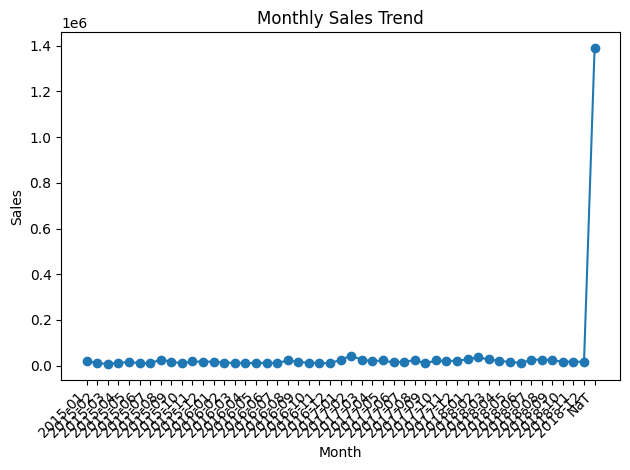

In [5]:
# IMPORTANT: Each chart gets its own cell, and no specific colors/styles are set.
# Plot 1: Monthly Sales trend (if computed)
if 'Order_Month' in df.columns and 'Sales' in df.columns:
    monthly_plot = (df.groupby('Order_Month')['Sales'].sum()
                      .reset_index()
                      .sort_values('Order_Month'))
    plt.figure()
    plt.plot(monthly_plot['Order_Month'], monthly_plot['Sales'], marker='o')
    plt.xticks(rotation=45, ha='right')
    plt.title('Monthly Sales Trend')
    plt.xlabel('Month')
    plt.ylabel('Sales')
    plt.tight_layout()
    plt.show()


In [6]:
# Plot 2: Top 10 Products by Revenue (if 'Product' exists)
if 'Product' in df.columns and 'Sales' in df.columns:
    top_prod = (df.groupby('Product')['Sales'].sum()
                  .sort_values(ascending=False)
                  .head(10)
                  .reset_index())
    plt.figure()
    plt.bar(top_prod['Product'], top_prod['Sales'])
    plt.xticks(rotation=45, ha='right')
    plt.title('Top 10 Products by Revenue')
    plt.xlabel('Product')
    plt.ylabel('Sales')
    plt.tight_layout()
    plt.show()


In [7]:
# Plot 3: Category vs Profit (bar) if available
if 'Category' in df.columns and 'Profit' in df.columns:
    cat_profit = df.groupby('Category')['Profit'].sum().reset_index()
    plt.figure()
    plt.bar(cat_profit['Category'], cat_profit['Profit'])
    plt.xticks(rotation=0)
    plt.title('Profit by Category')
    plt.xlabel('Category')
    plt.ylabel('Profit')
    plt.tight_layout()
    plt.show()


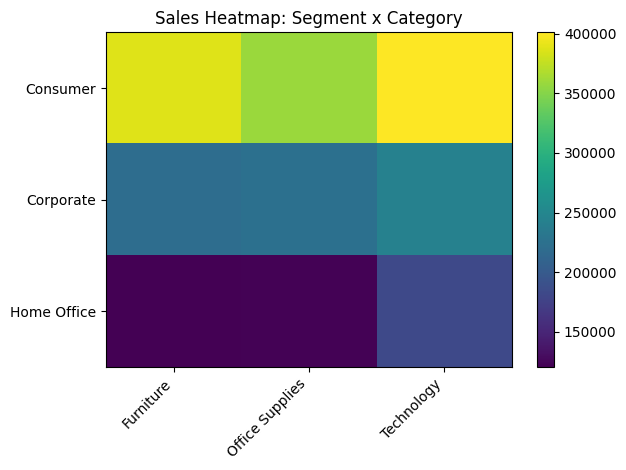

In [8]:
# Plot 4: Heatmap of Category x Segment Sales (imshow)
if set(['Segment','Category']).issubset(df.columns) and 'Sales' in df.columns:
    mat = pd.pivot_table(df, index='Segment', columns='Category', values='Sales', aggfunc='sum', fill_value=0)
    plt.figure()
    plt.imshow(mat.values, aspect='auto')
    plt.xticks(range(len(mat.columns)), mat.columns, rotation=45, ha='right')
    plt.yticks(range(len(mat.index)), mat.index)
    plt.title('Sales Heatmap: Segment x Category')
    plt.colorbar()
    plt.tight_layout()
    plt.show()


## 6) Excel Processing: Multi‑Sheet Export, AutoFilter, Conditional Formatting

In [12]:
# Export curated outputs to Excel with multiple sheets
out_path = "analysis_output.xlsx"
with pd.ExcelWriter(out_path, engine="xlsxwriter") as writer:
    # Raw (limited rows for file size)
    df.head(1000).to_excel(writer, index=False, sheet_name="SampleRaw")
    
    # Summaries
    if 'Category' in df.columns and 'Sales' in df.columns:
        sales_by_cat = df.groupby('Category', as_index=False)['Sales'].sum().sort_values('Sales', ascending=False)
        sales_by_cat.to_excel(writer, index=False, sheet_name="SalesByCategory")
    if 'Segment' in df.columns and 'Profit' in df.columns and 'Category' in df.columns:
        pivot = pd.pivot_table(df, index='Segment', columns='Category', values='Profit', aggfunc='sum', fill_value=0)
        pivot.to_excel(writer, sheet_name="ProfitPivot")

    workbook  = writer.book
    # AutoFilter + conditional formatting examples
    if 'SalesByCategory' in writer.sheets:
        sheet = writer.sheets['SalesByCategory']
        # Apply AutoFilter on the header row
        sheet.autofilter(0, 0, sales_by_cat.shape[0], sales_by_cat.shape[1]-1)
        # Conditional formatting on Sales column
        sales_col = 1  # zero-based index (after export)
        sheet.conditional_format(1, sales_col, sales_by_cat.shape[0], sales_col, 
                                 {'type': '3_color_scale'})

print(f"Excel exported → {{out_path}}")


Excel exported → {out_path}


## 7) SQL (SQLite): Import DataFrame → Queries (including Window Functions)

In [16]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment',
       'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name',
       'Sales', 'Year', 'Month', 'Order_Month', 'Target_Sales', 'Sub-Category_clean'],
      dtype='object')

In [ ]:
import sqlite3

conn = sqlite3.connect("analytics.db")
df.to_sql("sales", conn, if_exists="replace", index=False)

# 7.1 Monthly Sales Trend
q1 = '''
SELECT strftime('%Y-%m', DATE([Order Date])) AS Month,
       SUM(COALESCE(Sales, 0)) AS Total_Sales
FROM sales
GROUP BY Month
ORDER BY Month;
'''
monthly_sql = pd.read_sql(q1, conn)
display(monthly_sql.head(12))

# 7.2 Top 10 Products by Revenue
q2 = '''
SELECT [Product Name], SUM(COALESCE(Sales, 0)) AS Revenue
FROM sales
GROUP BY [Product Name]
ORDER BY Revenue DESC
LIMIT 10;
'''
top10_sql = pd.read_sql(q2, conn)
display(top10_sql)

# 7.3 Profitability by Category and Segment
q3 = '''
SELECT [Category], [Segment], 
       SUM(COALESCE(Sales, 0))  AS Total_Sales
FROM sales
GROUP BY [Category], [Segment]
ORDER BY Total_Sales DESC;
'''
cat_seg_sql = pd.read_sql(q3, conn)
display(cat_seg_sql.head(20))

# 7.4 Window Function: Running total of sales by Category ordered by Month
q4 = '''
WITH base AS (
    SELECT 
        [Category],
        strftime('%Y-%m', DATE([Order Date])) AS Month,
        SUM(COALESCE(Sales, 0)) AS Sales_Month
    FROM sales
    GROUP BY [Category], Month
)
SELECT 
    [Category],
    Month,
    Sales_Month,
    SUM(Sales_Month) OVER (PARTITION BY [Category] ORDER BY Month ROWS BETWEEN UNBOUNDED PRECEDING AND CURRENT ROW) AS Running_Total
FROM base
ORDER BY [Category], Month;
'''
running_sql = pd.read_sql(q4, conn)
display(running_sql.head(20))

conn.close()


,Month,Total_Sales
0,None,1.389174e+06
1,2015-09,6.658237e+04
2,2016-02,1.039512e+05
3,2016-03,7.178869e+04
4,2016-07,6.239395e+04
...,...,...
7,2017-04,6.509495e+04
8,2017-05,6.427708e+04
9,2017-08,1.005604e+05
10,2017-12,6.481937e+04


,Product Name,Revenue
0,Canon imageCLASS 2200 Advanced Copier,61599.824
1,Fellowes PB500 Electric Punch Plastic Comb Bin...,27453.384
2,Cisco TelePresence System EX90 Videoconferenci...,22638.480
3,HON 5400 Series Task Chairs for Big and Tall,21870.576
4,GBC DocuBind TL300 Electric Binding System,19823.479
5,GBC Ibimaster 500 Manual ProClick Binding System,19024.500
6,Hewlett Packard LaserJet 3310 Copier,18839.686
7,HP Designjet T520 Inkjet Large Format Printer ...,18374.895
8,GBC DocuBind P400 Electric Binding System,17965.068
9,High Speed Automatic Electric Letter Opener,17030.312


DatabaseError: Execution failed on sql '
SELECT [Category], [Segment], 
       SUM(COALESCE(Profit, 0)) AS Total_Profit,
       SUM(COALESCE(Sales, 0))  AS Total_Sales
FROM sales
GROUP BY [Category], [Segment]
ORDER BY Total_Profit DESC;
': no such column: Profit


## 8) Next Steps / Customization

- Point `DATA_PATH` to your actual CSV/Excel file.
- Add role‑specific analyses (e.g., **marketing funnel**, **sales cohort analysis**, **customer segmentation**).
- Swap/extend SQL queries to mirror the job description (window functions, CTEs, joins).
- Export charts to images and add them into your resume/portfolio.
